In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def repeat_list(lst, times):
    return lst * times

def calculate_total_cost(consumption_file, price_file):

    consumption_df = pd.read_csv(consumption_file)
    price_df = pd.read_csv(price_file)

    consumption_values = consumption_df['Usage'].values
    price_values = price_df['€/kWh'].values

    repeated_prices = [price for price in price_values for _ in range(2)] # Dado que el consumo es cada media hora y el precio es por hora, repetimos cada precio dos veces
    times = int(len(consumption_values) / 48) #repetir para todas las semanas del fichero
    def_prices = repeat_list(repeated_prices, times)

    total_cost = sum(consumption_values * def_prices) # Calculamos el coste total

    return total_cost

def plot_consumptions(*file_paths):
    plt.figure(figsize=(10, 6))

    for idx, f in enumerate(file_paths):
        df = pd.read_csv(f)
        consumption = df['Usage'][:48*5]

        if f == str(meter_ID) + "_0_60.csv":
          attack = "Normal"
        elif f == str(meter_ID) + "_0_50.csv":
          attack = "Normal"
        elif f.endswith("_0_50.csv"):
          prefix = str(meter_ID) + "_"
          suffix = "_0_50.csv"
          attack = f.replace(prefix, '', 1).rsplit(suffix, 1)[0]
        else:
          prefix = str(meter_ID) + "_"
          suffix = "_0_60.csv"
          attack = f.replace(prefix, '', 1).rsplit(suffix, 1)[0]


        linestyle = '-' if idx == 0 else '--'
        plt.plot(consumption, label=attack, linestyle=linestyle)

    plt.xlabel('Tiempo (cada media hora)')
    plt.ylabel('Consumo (kWh)')
    plt.legend()
    plt.grid(True)

    return plt


# **Escenarios de consumo (Electricidad)**

In [ ]:
meter_ID = 1021
divisa = "€"
file_list = [str(meter_ID) + '_0_60.csv', str(meter_ID) + '_Avg_0_60.csv', str(meter_ID) + '_FDI10_0_60.csv', str(meter_ID) + '_FDI30_0_60.csv', str(meter_ID) + '_RSA_0.25_1.1_0_60.csv', str(meter_ID) + '_RSA_0.5_3_0_60.csv', str(meter_ID) + '_Swap_0_60.csv']
price_file = 'preciokWh-2.csv'

for f in file_list:
  if f == str(meter_ID) + "_0_60.csv":
    attack = "Normal"
  else:
    prefix = str(meter_ID) + "_"
    suffix = "_0_60.csv"
    attack = f.replace(prefix, '', 1).rsplit(suffix, 1)[0]

  print(attack + f": {calculate_total_cost(f, price_file):.2f}" + divisa)

Normal: 1081.79€
Avg: 1060.01€
FDI10: 108.18€
FDI30: 324.54€
RSA_0.25_1.1: 730.37€
RSA_0.5_3: 1897.45€
Swap: 982.43€


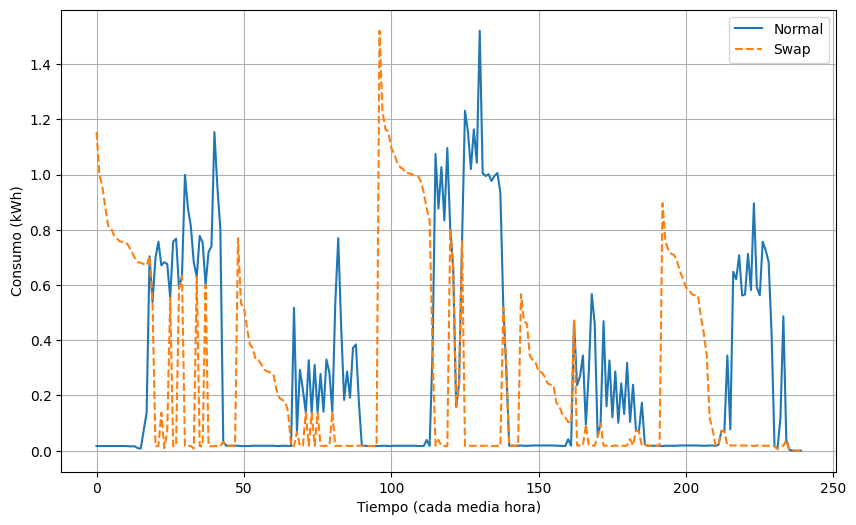

In [ ]:
# Ejemplo de uso
f1 = '1021_0_60.csv'
f2 = '1021_Swap_0_60.csv'
output_file = 'normal_vs_swap.png'
plt = plot_consumptions(f1, f2)
plt.savefig(output_file)
plt.show()

# **Escenarios de generación (SOLAR)**

In [ ]:
meter_ID = 1
divisa = "€"
file_list = [str(meter_ID) + '_0_50.csv', str(meter_ID) + '_Percentile_0_50.csv', str(meter_ID) + '_RSA_0.5_3_0_50.csv', str(meter_ID) + '_Rating_0_50.csv']
price_file = 'preciokWh_excedente.csv'

for f in file_list:
  if f == str(meter_ID) + "_0_50.csv":
    attack = "Normal"
  else:
    prefix = str(meter_ID) + "_"
    suffix = "_0_50.csv"
    attack = f.replace(prefix, '', 1).rsplit(suffix, 1)[0]

  print(attack + f": {calculate_total_cost(f, price_file):.2f}" + divisa)

Normal: 116.37€
Percentile: 414.44€
RSA_0.5_3: 204.75€
Rating: 1282.49€


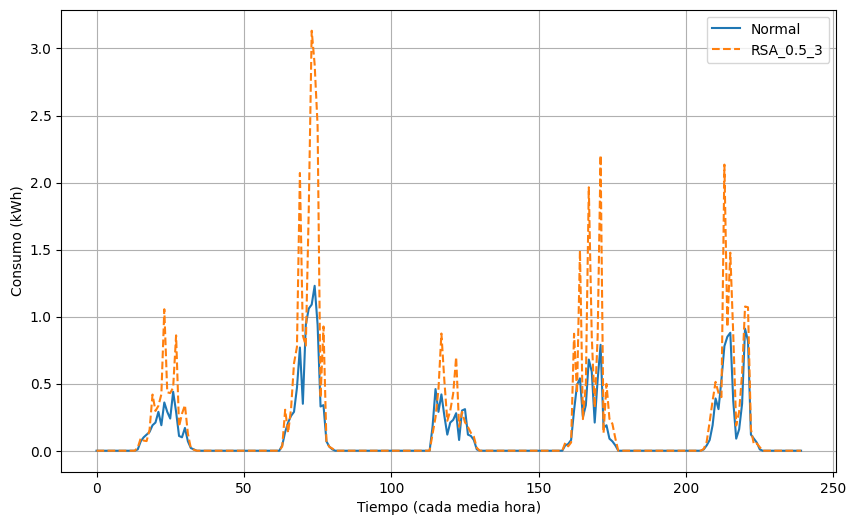

In [ ]:
# Ejemplo de uso
f1 = '1_0_50.csv'
f2 = '1_RSA_0.5_3_0_50.csv'
output_file = 'normal_vs_rsa_gen.png'
plt = plot_consumptions(f1, f2)
plt.savefig(output_file)
plt.show()